In [3]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler



In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


Load the Dataset

In [6]:
df = pd.read_csv("IRIS.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Visualization

In [7]:
# See the first few rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 data types and null values

In [8]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


how many rows per species

In [9]:
# Count of each species
df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

 Visualize feature distributions

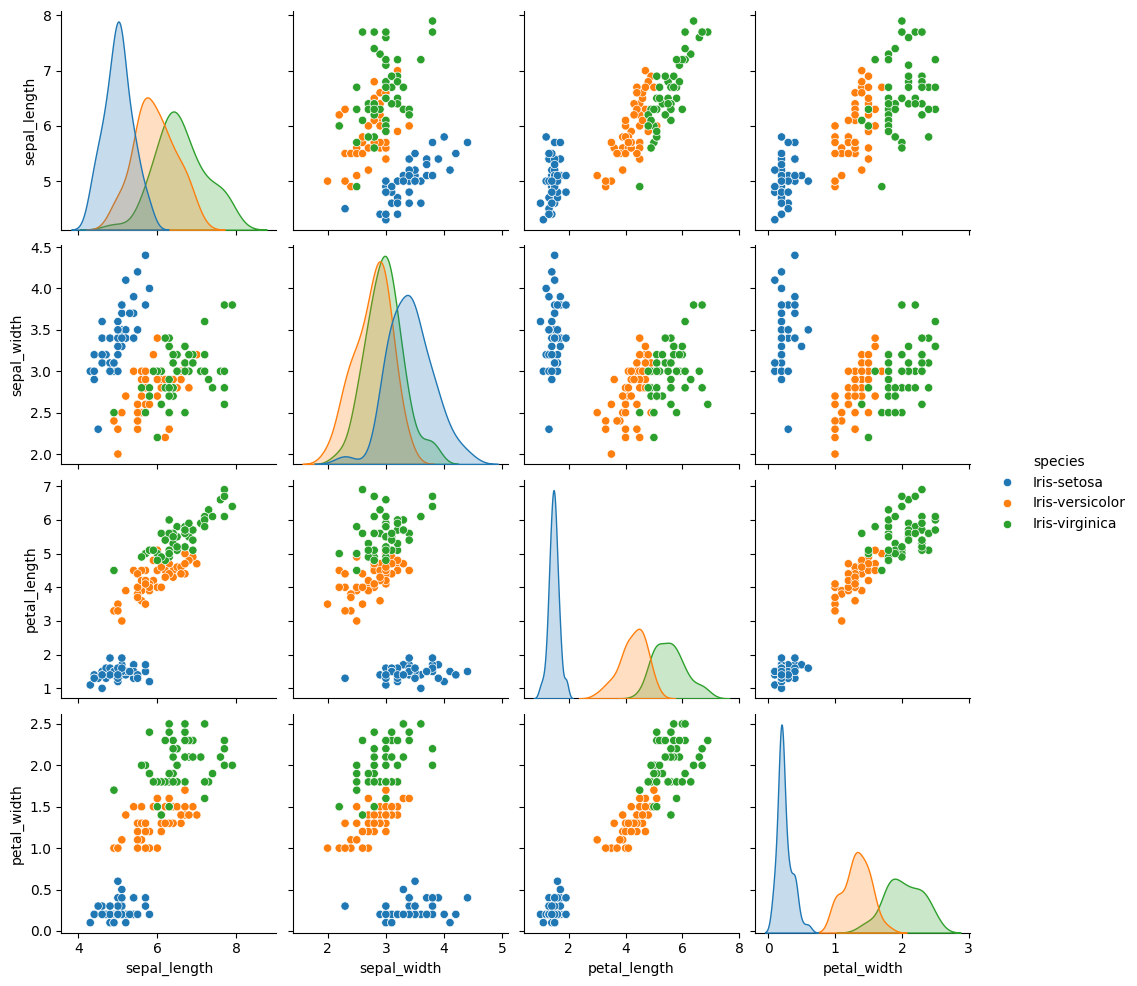

In [10]:
# Distribution of each feature by species
sns.pairplot(df, hue='species')
plt.show()


Correlation heatmap

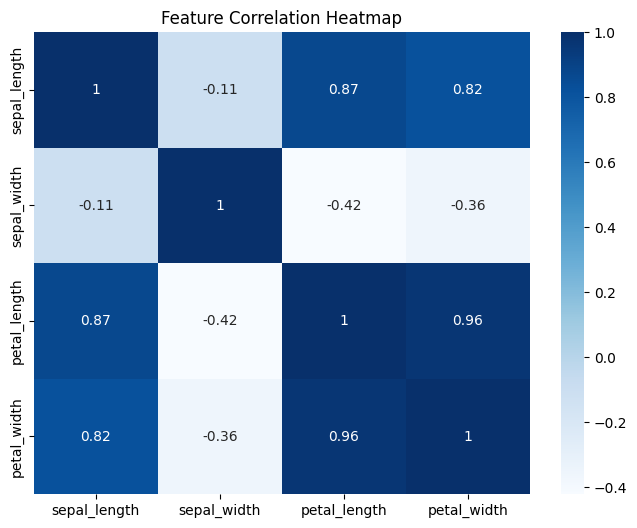

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()


Box Plot for Each Feature per Species

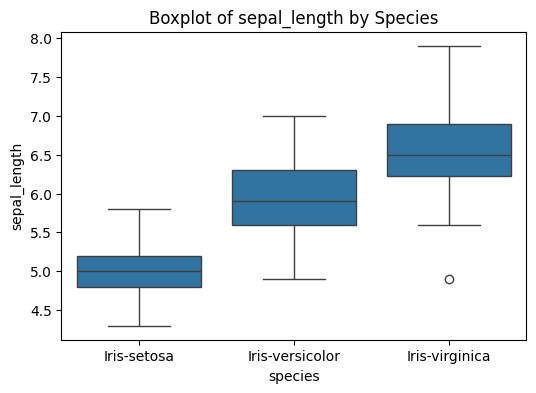

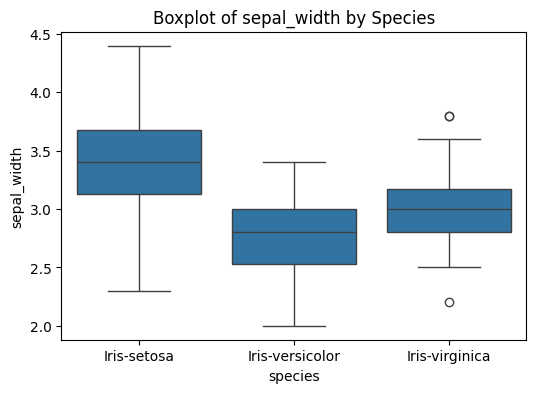

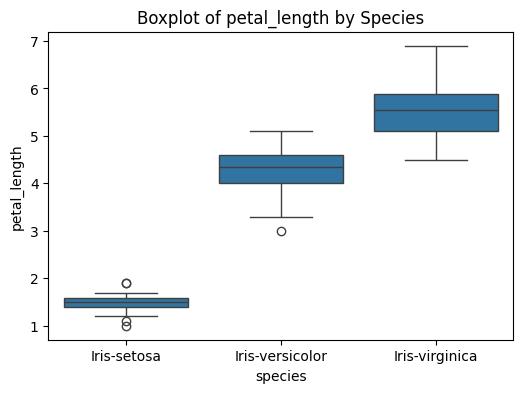

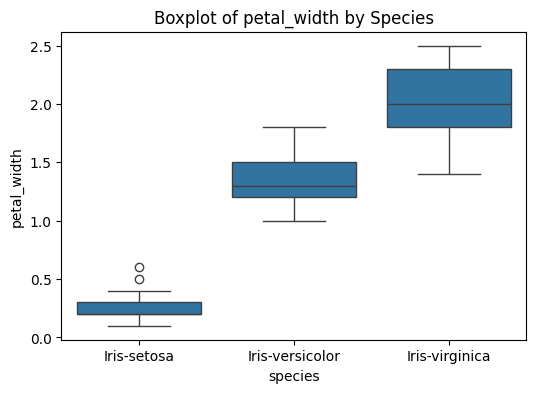

In [12]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Species")
    plt.show()


Violin Plot for Feature Distribution

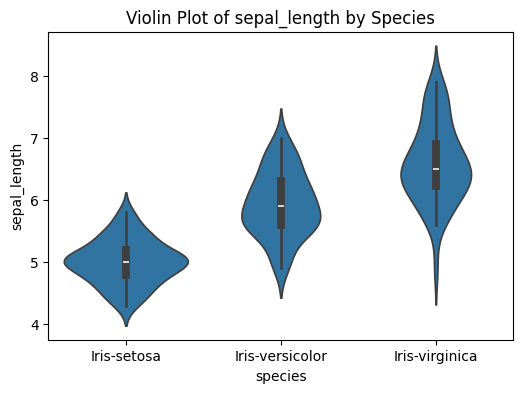

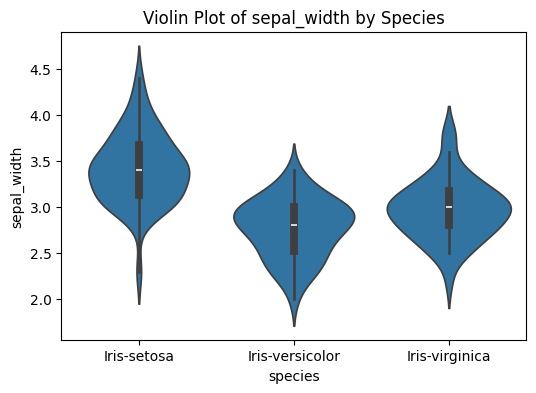

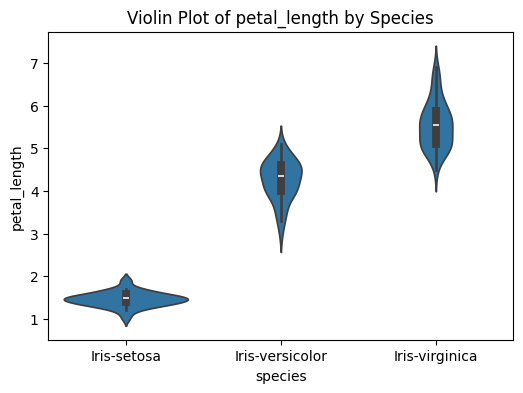

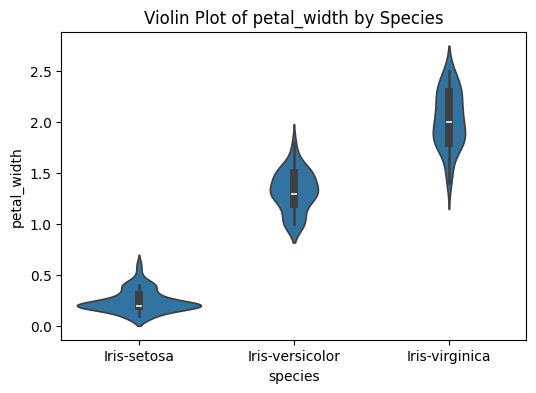

In [13]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f"Violin Plot of {feature} by Species")
    plt.show()


 Histogram of Each Feature

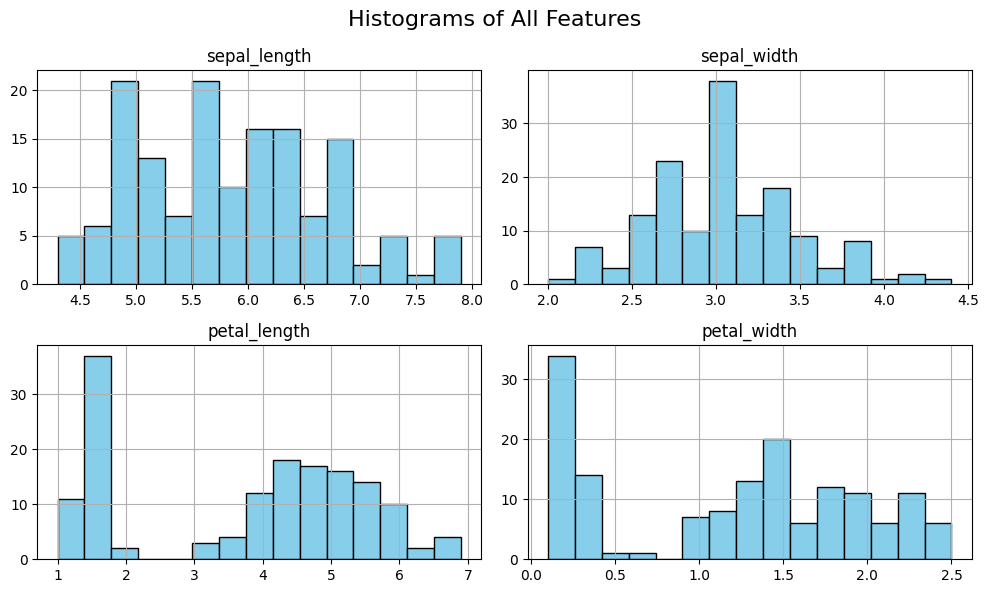

In [14]:
df.drop('species', axis=1).hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()


Swarm Plot for Detailed Spread

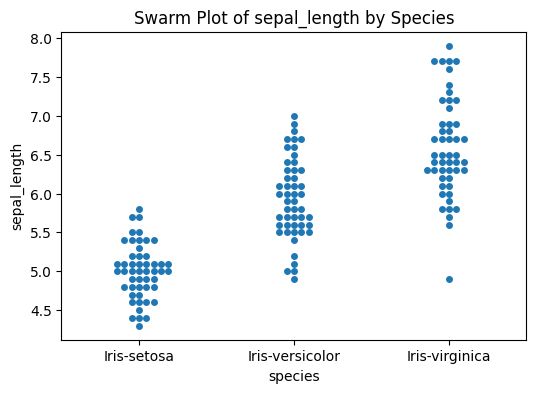

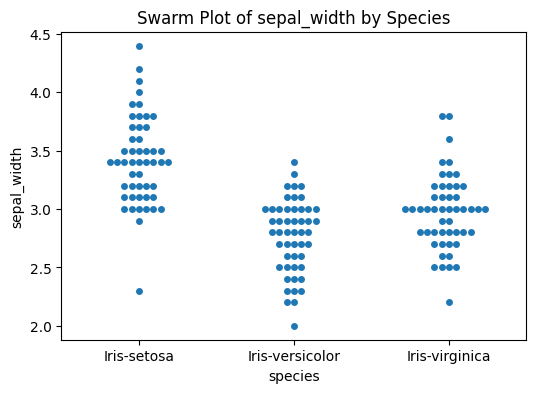

c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


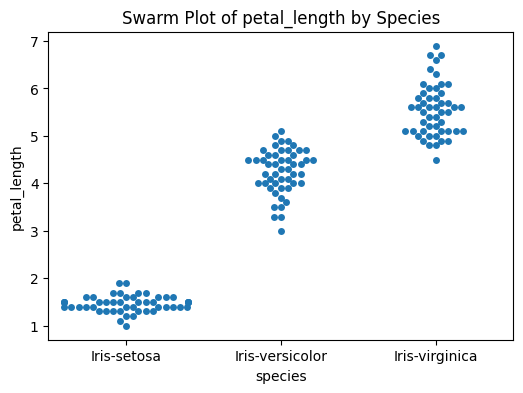

c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


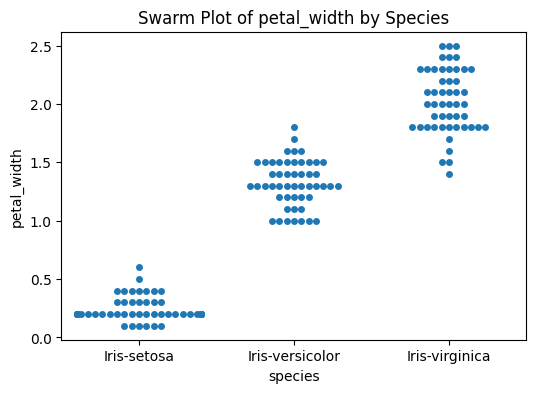

In [15]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.swarmplot(x='species', y=feature, data=df)
    plt.title(f"Swarm Plot of {feature} by Species")
    plt.show()


Dataset into Features and Target

In [16]:
# X = all input features
X = df.drop('species', axis=1)

# y = target/output label
y = df['species']


Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)


Training features: (120, 4)
Testing features: (30, 4)


Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
import pandas as pd
pd.DataFrame(X_train_scaled, columns=X.columns).head()


,sepal_length,sepal_width,petal_length,petal_width
0,-1.473937,1.220379,-1.563987,-1.309484
1,-0.133071,3.020017,-1.277280,-1.042922
2,1.085898,0.095606,0.385621,0.289886
3,-1.230143,0.770470,-1.219939,-1.309484
4,-1.717731,0.320560,-1.391963,-1.309484


Import Required ML Algorithms

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Compare

In [22]:
# Dictionary of model names and their objects
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
